In [1]:
 #this is for Airbnb Seatle data analysis and this work would be one of the outcome of the Udicity data scientist nanodegree project \n",
# Importing all the necessary libraries and packages. We will be using pythons nltk package and subsequent libraries for parsing the review column for natural language process \n",
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import nltk.corpus
from nltk.corpus import brown,stopwords,words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from random import shuffle
import seaborn as sns
import re
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer
from sklearn.impute import  SimpleImputer
from sklearn import linear_model
from statistics import mean
import collections
import matplotlib.cm as cm
import string

In [2]:
# For this blog we will be focussing on the Airbnb Listings, Reviews and Calendar data for Seatle Area\n",
# Loading and saving Airbnb Seatle Listings, Reviews and Calendar data in individual dataframes \n",
AIRBNB_Seatle_Listings = pd.read_csv("D:\\Udacity\\Udacity_AIRBNB_Project\\Seatle_AIRBNB\\listings.csv")
AIRBNB_Seatle_Reviews = pd.read_csv("D:\\Udacity\\Udacity_AIRBNB_Project\\Seatle_AIRBNB\\reviews.csv")
AIRBNB_Seatle_Calendar = pd.read_csv("D:\\Udacity\\Udacity_AIRBNB_Project\\Seatle_AIRBNB\\calendar.csv")


In [3]:
## A look at the AIRBNB_Seatle_Listings data frame:
AIRBNB_Seatle_Listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
AIRBNB_Seatle_Listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354321,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
## A look at the AIRBNB_Seatle_Reviews dataframe reflects that comments column is not included as it is a categorical field. 

AIRBNB_Seatle_Reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,7/19/2015,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,7/20/2015,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,7/26/2015,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,8/2/2015,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,8/10/2015,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
AIRBNB_Seatle_Reviews.describe()

In [6]:
## Overview of AIRBNB_Seatle_Calendar dataframe. We will be utilizing the listing_id and Price columns from this datafrmae. 
## We will be adjusting the datatype for price column to perform further calculation from it.

AIRBNB_Seatle_Calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
AIRBNB_Seatle_Calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [3]:

#we need to download all the nltk tool kits befor we start working on the customer reviews sentiments


In [3]:
nltk.download(["stopwords","pros_cons","tagsets","opinion_lexicon","vader_lexicon"])
words = words.words('en')
Unwanted_Words = nltk.corpus.stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rhnne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package pros_cons to
[nltk_data]     C:\Users\rhnne\AppData\Roaming\nltk_data...
[nltk_data]   Package pros_cons is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\rhnne\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\rhnne\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rhnne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Data Preprocessing
# For understanding the customer sentiments we will be utilizing the comments field from the Airbnb_Seatle_Reviews dataframe.
# we will be performing Natural Language Processing method to parse out the customers comments to understand their views for individual property in Seatle
# Creating empty dataframes for appending and subprocessing steps
Comments_New = []
Positive_Reviews = []
Negative_Reviews = []
Negative_Word_Tokenize = list()
Positive_Word_Tokenize = list()
Negative_Words_Tagged = list()
Positive_Words_Tagged = list()
All_Neg_Words = []
All_Pos_Words = []
Top_Negative_words = []
Top_Negative_words_counts = []
Top_Positive_words = []
Top_Positive_words_counts = []


Comments = AIRBNB_Seatle_Reviews['comments'].copy() # Creating a copy of AIRBNB_Seatle_Reviews data for processing comments column

Comments = Comments.dropna() # Dropping any missing values from the comments column since we do not want to impute values for comments

for com in Comments:
    Comments_New.append(re.findall('[A-Z][^A-Z]*', com)) # Replacing any special characters from the comments string

 # This script will loop over every string from the list of cleansed string and will score by running the nltk automated sentiment analyzer and saving the output in Positive and Negative Data frames
for strings in Comments_New:
    for string in strings:
        sia = SentimentIntensityAnalyzer()                    
        if sia.polarity_scores(string)['neg'] > .20 :
            Negative_Reviews.append({"Sia_Polarity_Score": sia.polarity_scores(string) ,"Comments": string})  
        else:
            Positive_Reviews.append({"Sia_Polarity_Score": sia.polarity_scores(string) ,"Comments": string})  


In [7]:
# Looping through Negative and Positive Reviews and Saving them in a Tokenized word list
for i in Negative_Reviews:
    if not i['Comments'].lower() in Unwanted_Words:
        Negative_Word_Tokenize.append(word_tokenize(i['Comments']))
                
for j in Positive_Reviews:
    if not j['Comments'] in Unwanted_Words:
        Positive_Word_Tokenize.append(word_tokenize(j['Comments']))   

In [8]:
# Looping through the tokenized list of negative and positive words and saving them in a tagged list 
for neg_words in Negative_Word_Tokenize:
    Negative_Words_Tagged.append(nltk.pos_tag(neg_words))
        
for pos_words in Positive_Word_Tokenize:
    Positive_Words_Tagged.append(nltk.pos_tag(pos_words))

In [9]:
# I utilized "Verb,Present Participle" to filer out the words representing negative and positive views of the guests in their comments
for tag_words in Negative_Words_Tagged:
    for tag_word in tag_words:
        if 'NN' in tag_word:
            All_Neg_Words.append(tag_word[0])
            
for tag_words in Positive_Words_Tagged:
    for tag_word in tag_words:
        if 'NN' in tag_word:
            All_Pos_Words.append(tag_word[0])

In [10]:
negative_counted_words = collections.Counter(All_Neg_Words)
for letter, count in negative_counted_words.most_common(10):
    negative_counted_words = collections.Counter(All_Neg_Words)
    Top_Negative_words.append(letter)
    Top_Negative_words_counts.append(count) 
    print(letter,count)

block 138
problem 126
place 96
bus 58
location 54
apartment 53
chance 49
stop 46
bit 46
stay 45


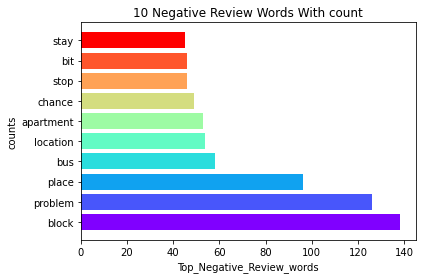

In [11]:
colors = cm.rainbow(np.linspace(0, 1, 10))
fig_1 = plt.figure()
plt.title('10 Negative Review Words With count')
plt.xlabel('Top_Negative_Review_words')
plt.ylabel('counts')
plt.barh(Top_Negative_words,Top_Negative_words_counts, color=colors)
plt.show()

In [12]:
positive_counted_words = collections.Counter(All_Pos_Words)
for letter, count in positive_counted_words.most_common(10):
    Top_Positive_words.append(letter)
    Top_Positive_words_counts.append(count)
    print(letter,count)

place 7065
stay 4344
location 4254
house 3476
apartment 3454
home 3234
host 3045
room 3009
neighborhood 2982
time 2883


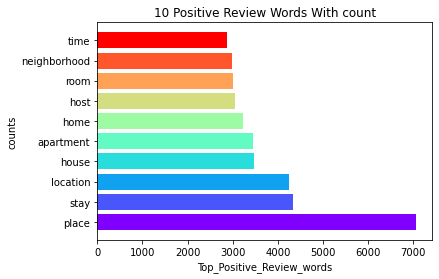

In [13]:
colors = cm.rainbow(np.linspace(0, 1, 10))
fig = plt.figure()
plt.title('10 Positive Review Words With count')
plt.xlabel('Top_Positive_Review_words')
plt.ylabel('counts')
plt.barh(Top_Positive_words,Top_Positive_words_counts, color=colors)
plt.show()

In [17]:
#Question 2
# What are the rental property types for the Airbnb Seatle area gets the highest booking 
# In order to understand the most preffered proprty types by the customers in Seatle Area we will be looking at the proprty types on the basis of review score ratings\n",
# and the amount of reviews per month that these rental properties have got.  

AIRBNB_Seatle_Property_Types = AIRBNB_Seatle_Listings.filter(["id","property_type","review_scores_rating","reviews_per_month"], axis=1).copy()

## Identifying columns that have highe missing value percentages
AIRBNB_Seatle_Property_Types.isna().sum()/len(AIRBNB_Seatle_Property_Types) *100 
    
# Below figure clearly shows that review_scores_rating and reviews_per_month contains the higest percentages for missing values.\n",



id                       0.000000
property_type            0.026192
review_scores_rating    16.946045
reviews_per_month       16.422211
dtype: float64

In [18]:
# Since we will be utilzing both these columns for further analysis we will be imputing values for missing rows 
# For imputing the missing values for review_scores_rating and reviews_per_month columns, we utilzied multiple imputation chained equation (MICE) method with linear regression Baysian Ridge.\n",
# This method will help in imputing values for missing rows in a scaled and effective way.
    
# Creating Mice Imputer
Mice_Imputer = IterativeImputer(estimator=linear_model.BayesianRidge(),n_nearest_features=None, imputation_order='ascending')    
## Fitting the imputed values for both the missing columns",
AIRBNB_Seatle_Property_Types['review_scores_rating'] = Mice_Imputer.fit_transform(AIRBNB_Seatle_Property_Types['review_scores_rating'].to_frame())
AIRBNB_Seatle_Property_Types['reviews_per_month'] = Mice_Imputer.fit_transform(AIRBNB_Seatle_Property_Types['reviews_per_month'].to_frame())
    
# Before we perform any calculation on the imputed columns we need to change the data types as "int64" else it will output in 'NAN' values 
    
AIRBNB_Seatle_Property_Types['review_scores_rating'] = AIRBNB_Seatle_Property_Types['review_scores_rating'].astype("int64")
AIRBNB_Seatle_Property_Types['reviews_per_month'] = AIRBNB_Seatle_Property_Types['reviews_per_month'].astype("int64")

#Calculating the mean values for 'review score rating' for each rental property type
AIRBNB_Seatle_Property_Review_Score = AIRBNB_Seatle_Property_Types.groupby(["property_type"])['review_scores_rating'].sum()/len(AIRBNB_Seatle_Property_Types['review_scores_rating'])
AIRBNB_Seatle_Property_Review_Score


property_type
Apartment          42.042954
Bed & Breakfast     0.922734
Boat                0.199057
Bungalow            0.328706
Cabin               0.529335
Camper/RV           0.324515
Chalet              0.043740
Condominium         2.264274
Dorm                0.047145
House              42.985595
Loft                0.997381
Other               0.552907
Tent                0.123625
Townhouse           2.960189
Treehouse           0.074908
Yurt                0.026192
Name: review_scores_rating, dtype: float64

<Figure size 432x288 with 0 Axes>

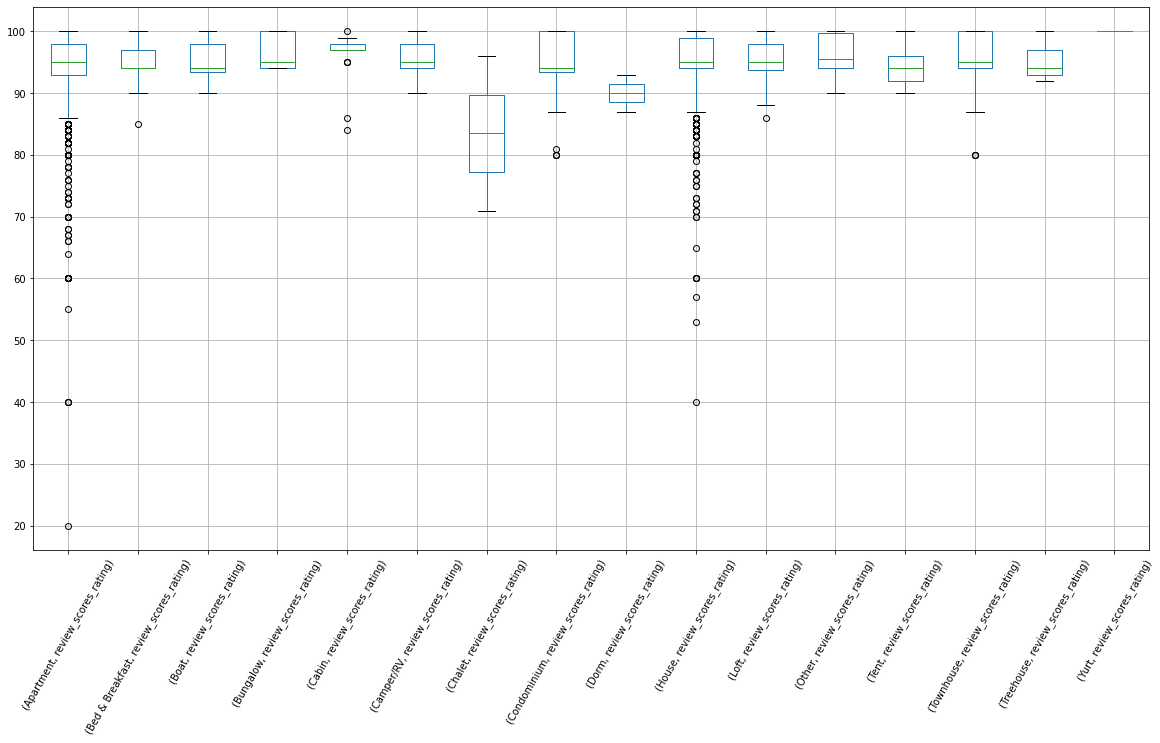

<Figure size 432x288 with 0 Axes>

In [20]:
#Below output as per review scores rating clearly suggests that the property type such as "Appartment" ,"House" and "Townhouse"  remains the most prefferred rental property for travellers in Seattle"
AIRBNB_Seatle_Property_Types.groupby(['property_type']).boxplot(column='review_scores_rating',subplots=False,rot=60,figsize=(20,10))
plt.figure()
 

In [ ]:
#Question 3:
##  How much Airbnb homes are earning in certain time frames and areas.

In [15]:
AIRBNB_Seatle_Listing_Price = AIRBNB_Seatle_Calendar.copy() ## creating a copy from Calendar df
    
AIRBNB_Seatle_Listing_Price['available'] = np.where(AIRBNB_Seatle_Listing_Price["available"] == "t",1,0 ) ## encoding boolean values 
    
AIRBNB_Seatle_Listing_Price =   AIRBNB_Seatle_Listing_Price.rename(columns ={"listing_id": "id"}) ## for keeping consistency btween  dataframes
    
AIRBNB_Seatle_Listing_Price['price'] = AIRBNB_Seatle_Listing_Price['price'].replace('[\\$,+]', '', regex=True).astype(float)
    
    
# Imputing missig values for price column
Mean_Imputer = SimpleImputer(strategy='mean')
AIRBNB_Seatle_Listing_Price['price']  = Mean_Imputer.fit_transform(AIRBNB_Seatle_Listing_Price['price'].values.reshape(-1,1))
AIRBNB_Seatle_Listing_Price['price'] = round(AIRBNB_Seatle_Listing_Price['price'],2)
AIRBNB_Seatle_Listing_Price['month'] = pd.DatetimeIndex(AIRBNB_Seatle_Listing_Price['date']).month_name()
   
## Joining Seatle Listing and Calendar Dataframe 
Airbnb_Seatle_Revenue = pd.merge(AIRBNB_Seatle_Listings,AIRBNB_Seatle_Listing_Price,how='inner',on='id')

## Filtering only columns that we will use for analysis
Airbnb_Seatle_Revenue = Airbnb_Seatle_Revenue.filter(['id','property_type','neighbourhood_cleansed','price_y','available','month','availability_365']).copy()
    
## Renaming some of the column names
Airbnb_Seatle_Revenue = Airbnb_Seatle_Revenue.rename(columns = {'property_type':'Property_Type','price_y':'Price_Per_Day','availability_365': 'Available_Yearly','neighbourhood_cleansed':'Neighbourhood','month':'Month'})
# Created a new calculated field based on the price per day of a rental property based on the availabilty 
Airbnb_Seatle_Revenue['Total_Rental'] = Airbnb_Seatle_Revenue['Price_Per_Day'] * Airbnb_Seatle_Revenue['available']
Airbnb_Seatle_Revenue['Total_Rental'] = round(Airbnb_Seatle_Revenue['Total_Rental'],2)    
#
Airbnb_Seatle_Revenue.groupby(['Month'])['Total_Rental'].mean()
                                                                                  
                                                                                     

Month
April         89.683700
August        97.181255
December     100.958803
February      82.308439
January       69.683499
July          95.377854
June          99.453597
March         91.233047
May           94.281823
November      96.879911
October       95.444659
September     96.612092
Name: Total_Rental, dtype: float64

<Figure size 432x288 with 0 Axes>

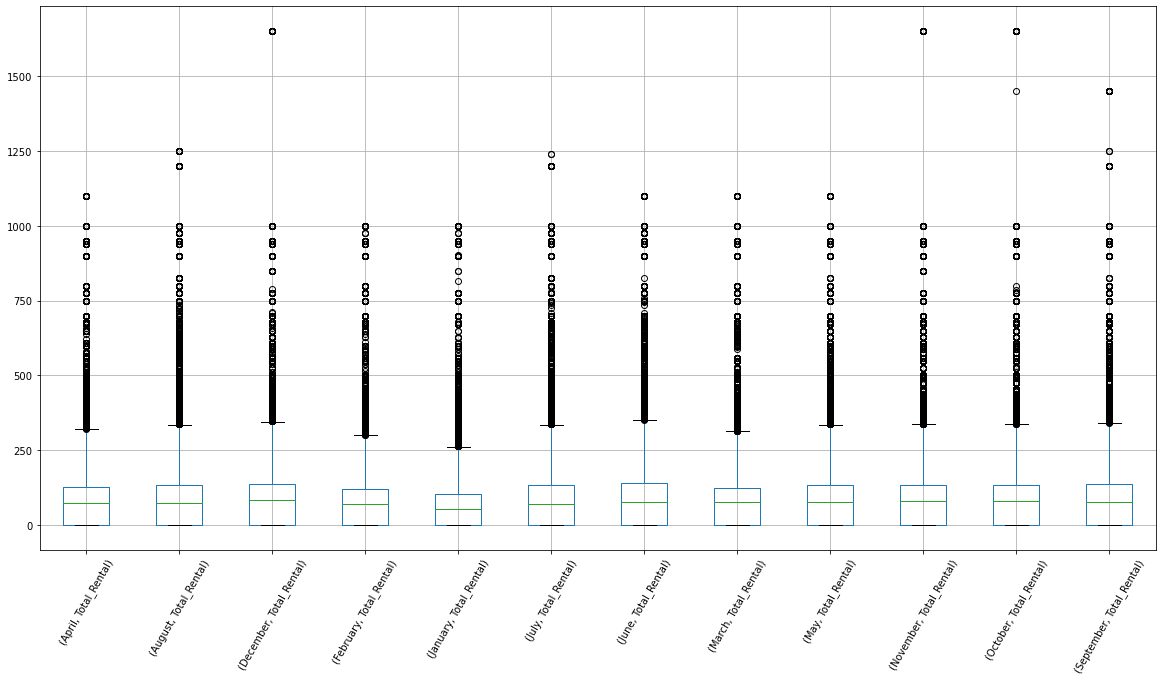

<Figure size 432x288 with 0 Axes>

In [39]:
## Airbnb Seatle Revenue by Months
Airbnb_Seatle_Revenue.groupby(['Month']).boxplot(column='Total_Rental',subplots=False,rot=60,figsize=(20,10))
plt.figure()

In [41]:
Airbnb_Seatle_Revenue.groupby(['Neighbourhood'])['Total_Rental'].mean()


Neighbourhood
Adams                80.519569
Alki                137.398761
Arbor Heights       106.575342
Atlantic             74.857172
Belltown            125.776045
                       ...    
West Woodland        82.392808
Westlake            140.409670
Whittier Heights     85.548894
Windermere          160.002740
Yesler Terrace       89.720064
Name: Total_Rental, Length: 87, dtype: float64

<Figure size 432x288 with 0 Axes>

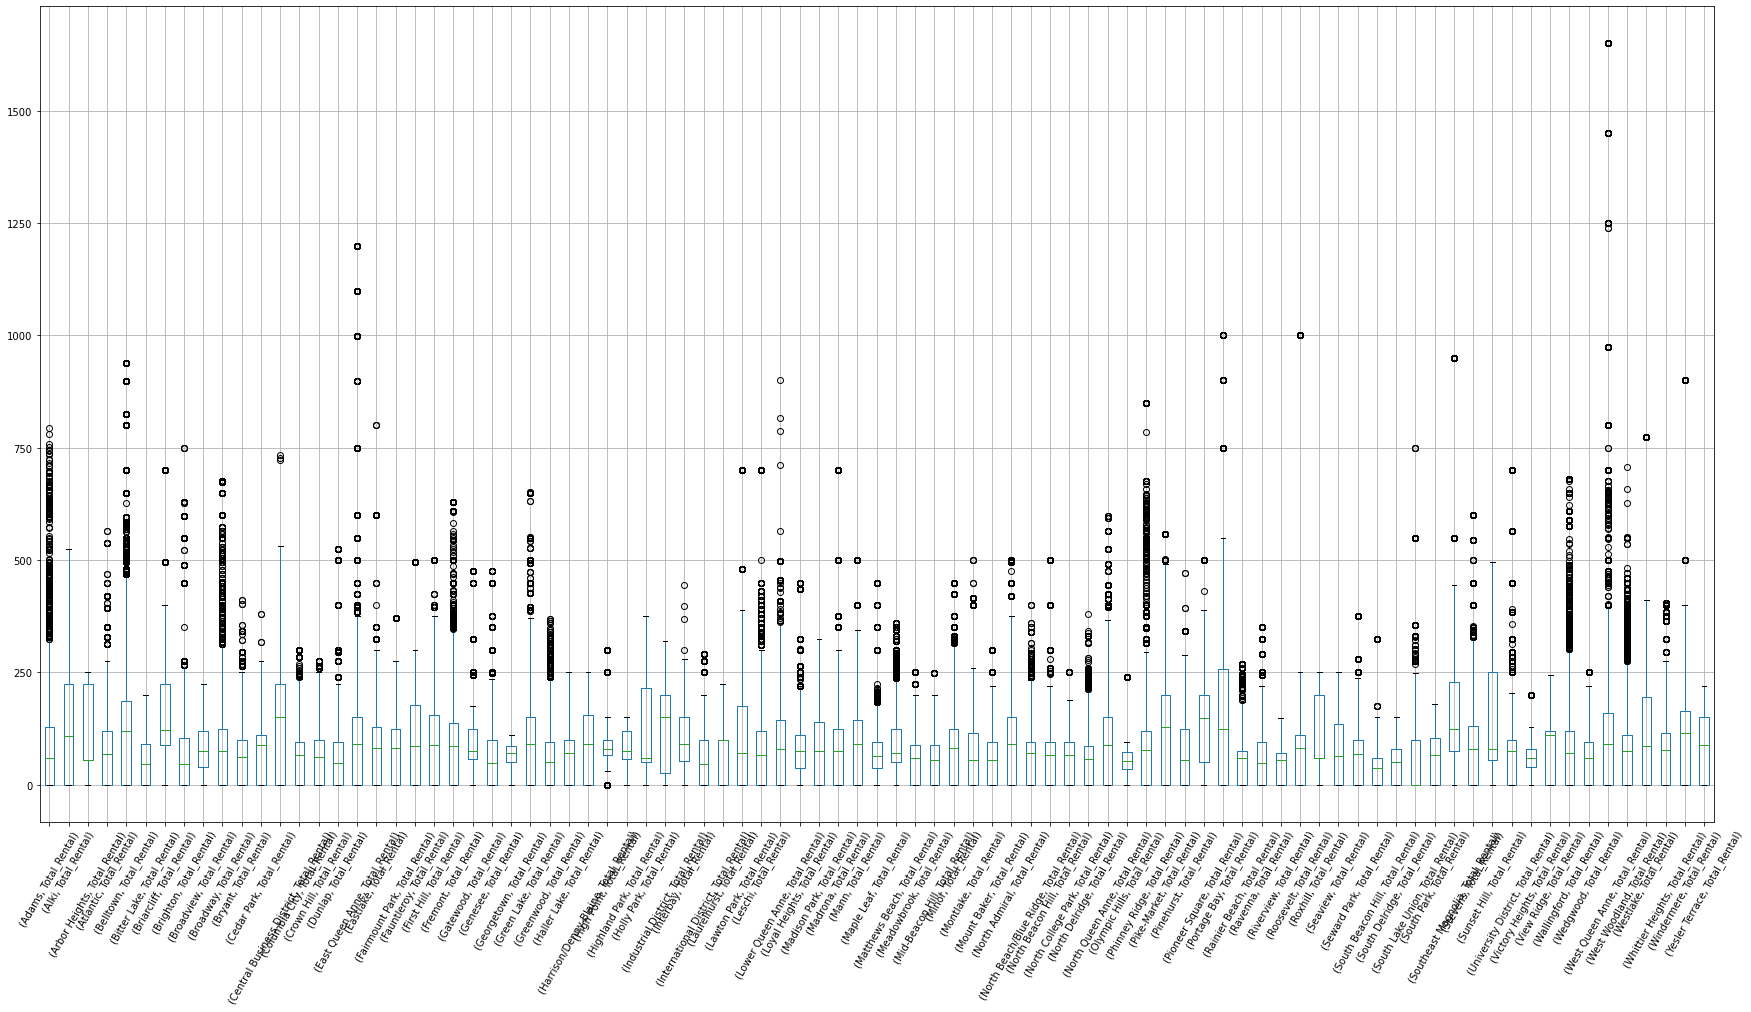

<Figure size 432x288 with 0 Axes>

In [19]:
## Airbnb Seatle Revenue by Neighbourhood
Airbnb_Seatle_Revenue.groupby(['Neighbourhood']).boxplot(column='Total_Rental',subplots=False,rot=60,figsize=(30,15))
plt.figure()